# Phase2Pro - Iteration 5C

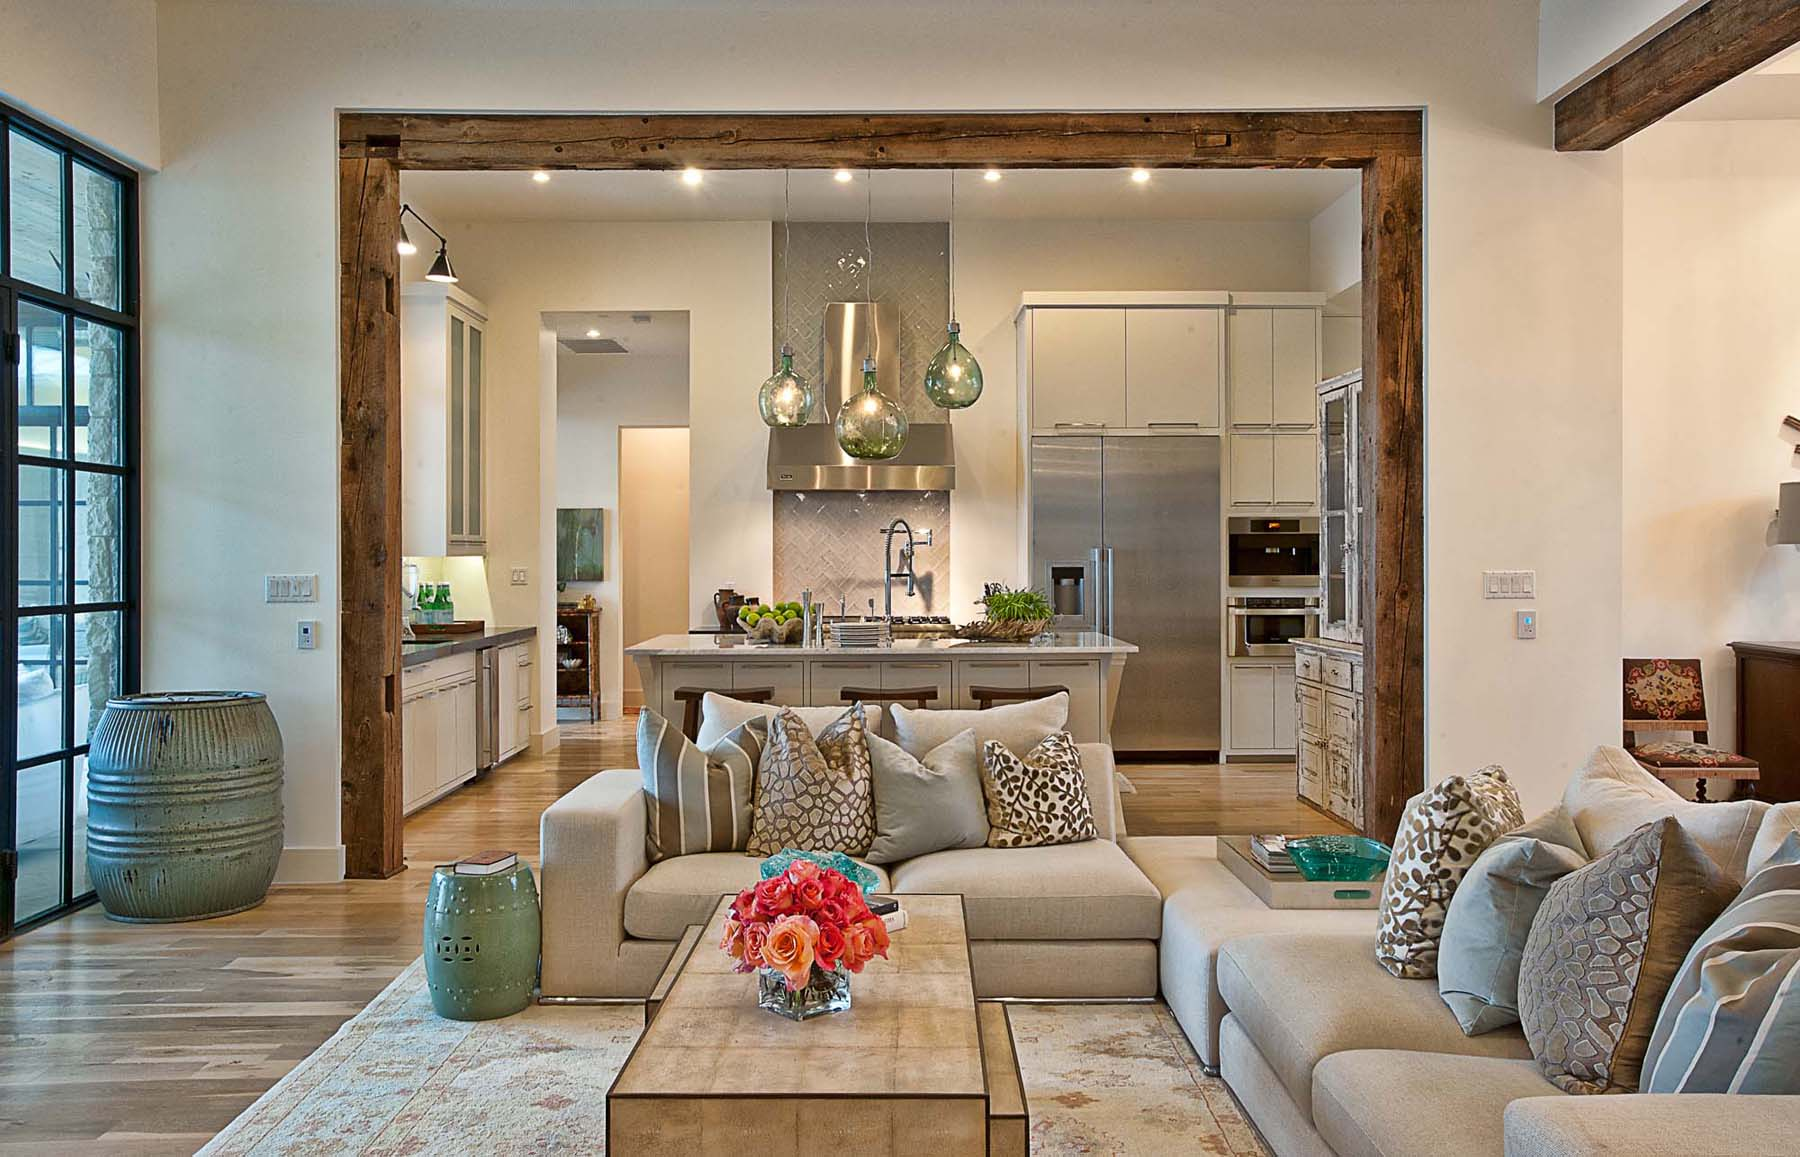

BUSINESS PROBLEM: 
King County Realty is a newly established local business in Northwestern America.
They are seeking some information regarding what attracts local buyers in this area to purchase new homes.
We will inspect the data set to determine what relationships and connections buyers have to purchasing a home and help King County Realty market their new business to suit.

What makes buyers in this area buy particular homes? 

A linear regression model will be used to understand the connections to the business problem usingthe OSMIN Model a our Data Science Process. 

In [1]:
#Import packages
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import scipy.stats as stats
from scipy import stats
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt 
from matplotlib.lines import Line2D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import random
from math import sqrt
import seaborn as sns
plt.style.use('seaborn')

**OBTAIN** - Data has been sourced from kc_house_data.csv.

In [2]:
#Import data set
data = pd.read_csv('data\\kc_house_data.csv')
data.isnull().sum()


id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

**SCRUB**: During this stage, we'll focus on cleaning the data. 

#Note that although technically, categorical data should be one-hot encoded during this step, in practice, it's usually done after data exploration. This is because it is much less time-consuming to visualize and explore a few columns containing categorical data than it is to explore many different dummy columns that have been one-hot encoded.

In [3]:
#refined dataset and drop unnecessary column data
data.drop(['id', 'date', 'waterfront', 'sqft_above', 'sqft_basement', 'lat', 'long', 'view', 'sqft_living15', 'sqft_lot15', 'waterfront', 'yr_renovated'], axis=1, inplace=True)

In [63]:
#Removed duplicates, show completed - Scrub
data.drop_duplicates(inplace=True)
#Show unique values for column data
data.nunique()

id               21420
date               372
price             3622
bedrooms            12
bathrooms           29
sqft_living       1034
sqft_lot          9776
floors               6
waterfront           2
view                 5
condition            5
grade               11
sqft_above         942
sqft_basement      304
yr_built           116
yr_renovated        70
zipcode             70
lat               5033
long               751
sqft_living15      777
sqft_lot15        8682
dtype: int64

In [64]:
#See size of dataset - Scrub
data.shape

(21597, 21)

In [66]:
#Show current types - Scrub
print(data.dtypes)
data = data.astype("int64", errors='ignore')
data.info()

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront       float64
view             float64
condition          int64
grade              int64
sqft_above         int64
sqft_basement     object
yr_built           int64
yr_renovated     float64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  


In [67]:
#to view statistics - Scrub
#lamba function to remove exponential values - Scrub
pd.options.display.float_format = lambda x : '{:.0f}'.format(x) if int(x) == x else '{:,.2f}'.format(x)
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597,21597,21597,21597,21597,21597,21597,19221,21534,21597,21597,21597,21597,17755,21597,21597,21597,21597,21597
mean,"4,580,474,287.77","540,296.57",3.37,2.12,"2,080.32","15,099.41",1.49,0.01,0.23,3.41,7.66,"1,788.60","1,971.00",83.64,"98,077.95",47.56,-122.21,"1,986.62","12,758.28"
std,"2,876,735,715.75","367,368.14",0.93,0.77,918.11,"41,412.64",0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,"27,274.44"
min,1000102,78000,1,0.50,370,520,1,0,0,1,3,370,1900,0,98001,47.16,-122.52,399,651
25%,2123049175,322000,3,1.75,1430,5040,1,0,0,3,7,1190,1951,0,98033,47.47,-122.33,1490,5100
50%,3904930410,450000,3,2.25,1910,7618,1.50,0,0,3,7,1560,1975,0,98065,47.57,-122.23,1840,7620
75%,7308900490,645000,4,2.50,2550,10685,2,0,0,4,8,2210,1997,0,98118,47.68,-122.12,2360,10083
max,9900000190,7700000,33,8,13540,1651359,3.50,1,4,5,13,9410,2015,2015,98199,47.78,-121.31,6210,871200


Below we set to explore the data set by deriving statistics and creating visualisation with dummy test data.

Null hypothesis:
There is no difference between experimental and control group - the sqft_living space does NOT affect a buyers decision to purchase a home. 
𝜇1=𝜇2μ1=μ2

Alternative Hypothesis:
There is a difference between experimental and control group - the sqft_living space does affect a buyers decision when purchasing a home. 
𝜇1≠𝜇2μ1≠μ2
#alpha value is 0.05

In [68]:
import scipy.stats as stats
x_bar = 20 # sample mean 
n = 21 # number of houses
sigma = 91 # sd of population
mu = 10 # Population mean 
z = (x_bar - mu)/(sigma/sqrt(n))
z


0.5035797466984439

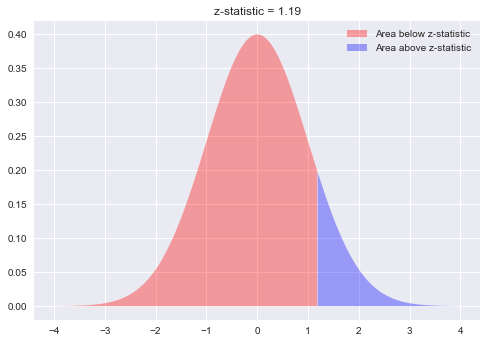

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('seaborn')
plt.fill_between(x=np.arange(-4,1.19,0.01),
                 y1= stats.norm.pdf(np.arange(-4,1.19,0.01)) ,
                 facecolor='red',
                 alpha=0.35,
                 label= 'Area below z-statistic'
                 )

plt.fill_between(x=np.arange(1.19,4,0.01), 
                 y1= stats.norm.pdf(np.arange(1.19,4,0.01)) ,
                 facecolor='blue',
                 alpha=0.35, 
                 label= 'Area above z-statistic')
plt.legend()
plt.title ('z-statistic = 1.19');

In [11]:
#show norm with degree of freedom
stats.norm.cdf(z)

0.6927216360567744

In [ ]:
#Pvalue minus degree of freedom 
pval = 1 - stats.norm.cdf(z)
pval

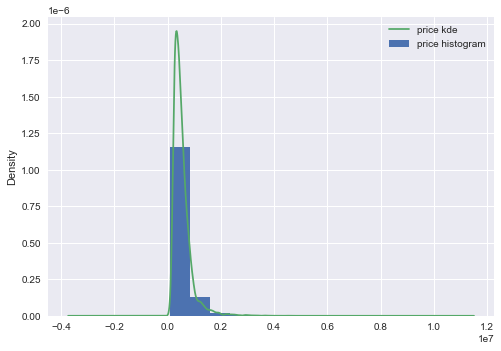

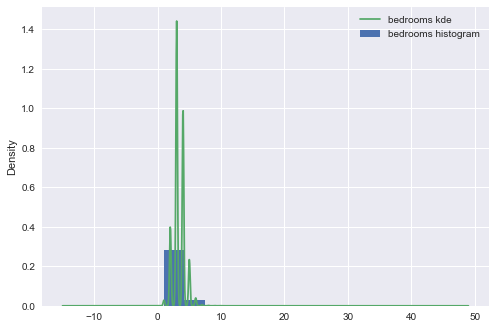

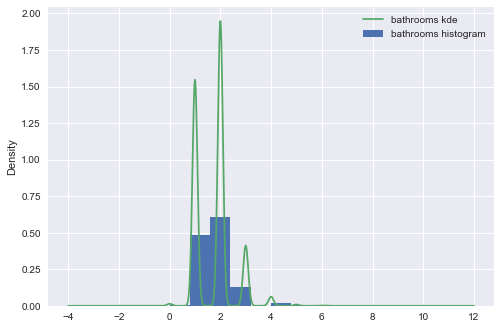

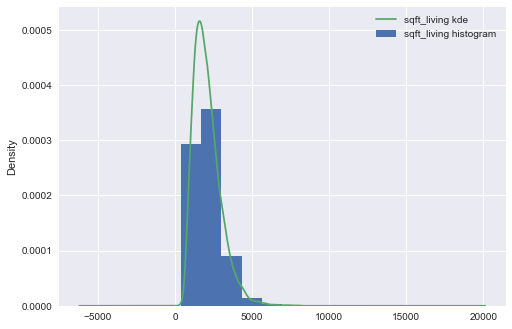

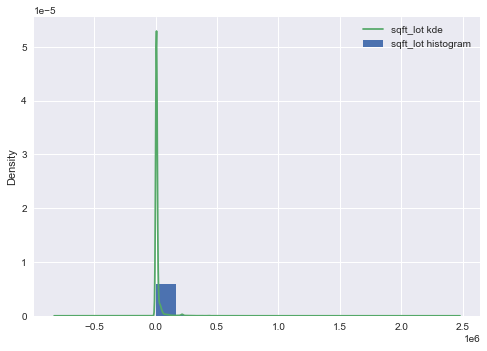

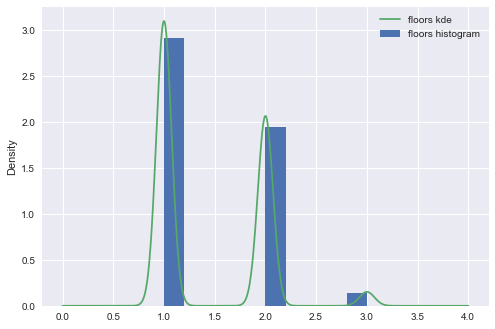

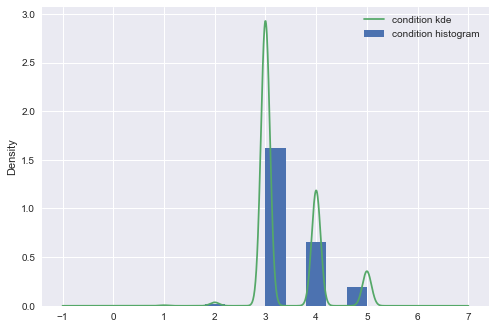

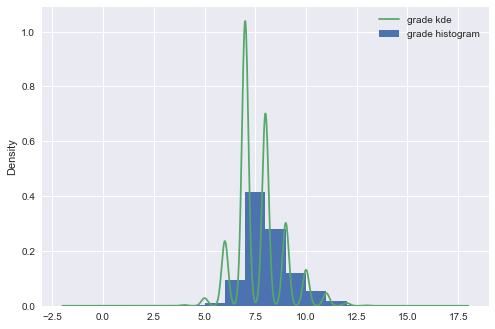

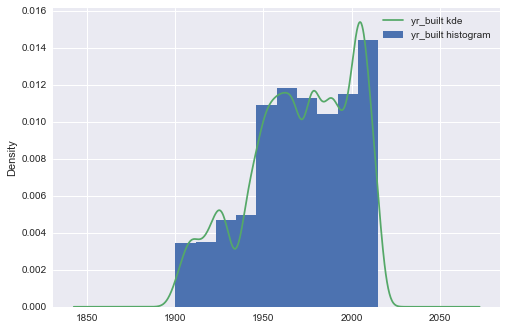

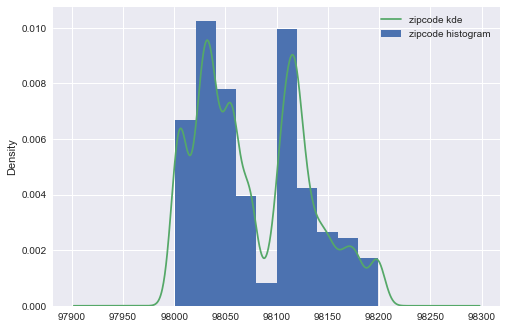

In [12]:
#Plotted KDE - Explore
for column in data:
    data[column].plot.hist(density=True, label = column+' histogram')
    data[column].plot.kde(label =column+' kde')
    plt.legend()
    plt.show()

In [19]:
# import libraries for OLS - Obtain 
import statsmodels.api as sm
import statsmodels.formula.api as smf

# build the formula - Explore 
f = 'price~sqft_living'
# create a fitted model in one line
model = smf.ols(formula=f, data=data).fit()
#Display OLS Summary - Explore 
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Thu, 26 May 2022   Prob (F-statistic):               0.00
Time:                        23:14:12   Log-Likelihood:            -2.9995e+05
No. Observations:               21589   AIC:                         5.999e+05
Df Residuals:                   21587   BIC:                         5.999e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.404e+04   4411.108     -9.984      0.000   -5.27e+04   -3.54e+04
sqft_living   280.8815      1.940    144.801      0.000     277.079     284.684
==============================================================================
Omnibus:                    14794.997   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542159.026
Skew:                           2.819   Prob(JB):                         0.00
Kurtosis:                      26.894   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Note that the R squared value is between 0  and 1 with a value of 0.493. This is a great sign that the "sqft_living" coefficient has a strong relationship to sale price. This info will add value to further research regarding understanding the relationships connecting Kings County homebuyers' requirements of buying a property. 

In [20]:
#create the column data
continuous = ['price', 'bedrooms', 'bathrooms', 'grade']
categoricals = ['sqft_living', 'sqft_lot', 'yr_built', 'zipcode', 'floors', 'condition']
data_cont = data[continuous]

In [21]:
# log features
log_names = [f'{column}_log' for column in data_cont.columns]
data_log = np.log(data_cont)
data_log.columns = log_names

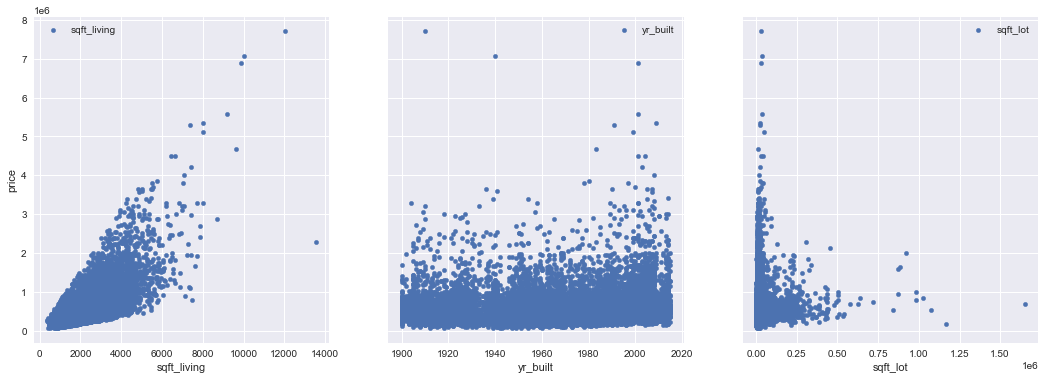

In [22]:
#Created a scatter plot for linearity - Explore 
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 6))
for idx, channel in enumerate(['sqft_living', 'yr_built', 'sqft_lot']):
    data.plot(kind='scatter', x=channel, y='price', ax=axs[idx], label=channel)
plt.legend()
plt.show()

As we can see, compared amongst the three continuous variables that the sqft_living relationship is linear. There are some outliers here, however if outliers are removed, you can discren that the size of sqft_living area does have a relationship with price, whereas yr_built and dqft_lot are not linear at all. 

   sqft_living
0          370
1        13540
0      59,884.22
1   3,759,093.93
dtype: float64


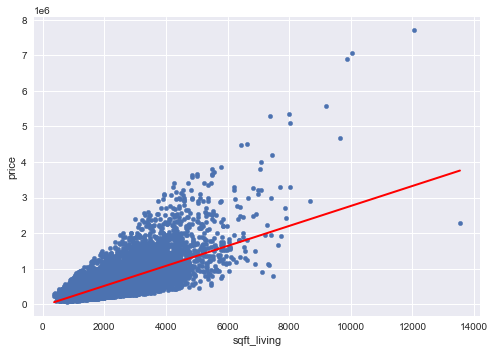

In [23]:
# create a DataFrame with the minimum and maximum values of Sqft_Living - Model 
X_new = pd.DataFrame({'sqft_living': [data.sqft_living.min(), data.sqft_living.max()]})
print(X_new.head())

# make predictions for those x values and store them - Model 
preds = model.predict(X_new)
print (preds)

# first, plot the observed data and the least squares line - Model 
data.plot(kind='scatter', x='sqft_living', y='price')
plt.plot(X_new, preds, c='red', linewidth=2)
plt.show()
 
 

In [25]:
# normalize 
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [27]:
# one hot encode categoricals 
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [28]:
# Split the data into training and test sets (assign 20% to test set)
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [33]:
# A brief preview of train-test split to create test training data and dummy data set - Explore to Model 
print(len(X_train), len(X_test), len(y_train), len(y_test))

17271 4318 17271 4318


In [58]:
# Force data as pandas DataFrame - Model 
def kfolds(data, k):
    data = pd.DataFrame(data)
    num_observations = len(data)
    fold_size = num_observations//k
    leftovers = num_observations%k
    folds = []
    start_obs = 0
    for fold_n in range(1,k+1):
        if fold_n <= leftovers:
            #Fold Size will be 1 larger to account for leftovers
            fold =  data.iloc[start_obs : start_obs+fold_size+1] 
            folds.append(fold)
            start_obs +=  fold_size + 1
        else:
            fold =  data.iloc[start_obs : start_obs+fold_size] 
            folds.append(fold)
            start_obs +=  fold_size          
    return folds 

In [59]:
#Setting axis 
data_data = pd.concat([X.reset_index(drop=True), y], axis=1)
data_folds = kfolds(data_data, 5)

In [60]:
#import mse packages and declare variable names
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.model_selection import cross_val_score
mse = make_scorer(mean_squared_error)
cv_5_results = cross_val_score(linreg, X, y, cv=5, scoring=mse)

C:\Users\racar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\racar\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\racar\anaconda3\lib\site-packages\sklearn\linear_model\_base.py", line 518, in fit
    X, y = self._validate_data(X, y, accept_sparse=accept_sparse,
  File "C:\Users\racar\anaconda3\lib\site-packages\sklearn\base.py", line 433, in _validate_data
    X, y = check_X_y(X, y, **check_params)
  File "C:\Users\racar\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 63, in inner_f
    return f(*args, **kwargs)
  File "C:\Users\racar\anaconda3\lib\site-packages\sklearn\utils\validation.py", line 871, in check_X_y
    X = check_array(X, accept_sparse=

In [62]:
#result of the mean
#cv_5_results.mean()

In [ ]:
#building the comparison data in a scatter plot 
import random
random.seed(110)

train_err = []
test_err = []
t_sizes = list(range(5,100,5))
for t_size in t_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=t_size/100)
    linreg.fit(X_train, y_train)
    y_hat_train = linreg.predict(X_train)
    y_hat_test = linreg.predict(X_test)
    train_err.append(mean_squared_error(y_train, y_hat_train))
    test_err.append(mean_squared_error(y_test, y_hat_test))
plt.scatter(t_sizes, train_err, label='Housing Training Error')
plt.scatter(t_sizes, test_err, label='Housing Testing Error')
plt.legend()

In [42]:
#Paired sample t-test (although data set is over 30)- exploration

data = pd.read_csv('data\\kc_house_data.csv')
data[['price','sqft_living']].describe()
ttest,pval = stats.ttest_rel(data['price'], data['sqft_living'])
print(pval)
if pval<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

0.0
reject null hypothesis


In [43]:
# normalize (subract mean and divide by std)
def normalize(feature):
    return (feature - feature.mean()) / feature.std()
data_log_norm = data_log.apply(normalize)

In [44]:
# one hot encode categoricals with dummy categoricals
data_ohe = pd.get_dummies(data[categoricals], prefix=categoricals[0], drop_first=True)
preprocessed = pd.concat([data_log_norm, data_ohe], axis=1)
X = preprocessed.drop('sqft_living', axis=1)
y = preprocessed['sqft_living']

In [45]:
# Split the data into training and test sets (assign 20% to test set)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
# A brief preview of train-test split samples
print(len(X_train), len(X_test), len(y_train), len(y_test))

In [ ]:
test_residuals = y_hat_test - y_test
test_mse = mean_squared_error(y_test, y_hat_test)
test_mse

C:\Users\racar\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\Users\racar\AppData\Local\Temp/ipykernel_10236/1081638490.py:4: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


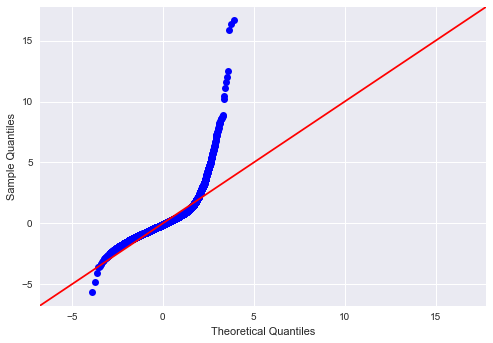

In [47]:
#import scipy.stats as stats
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

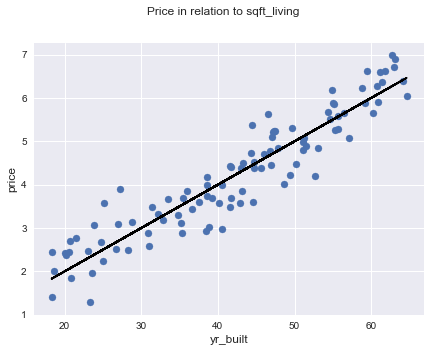

In [48]:
#Visualize price of houses in relation to sqft_living
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

np.random.seed(1234)
sen = np.random.uniform(18, 65, 100)
income = np.random.normal((sen/10), 0.5)
sen = sen.reshape(-1, 1)

fig = plt.figure(figsize=(7, 5))
fig.suptitle('Price in relation to sqft_living', fontsize=12)
plt.scatter(sen, income)
plt.plot(sen, sen/10, c='black')
plt.xlabel('yr_built', fontsize=12)
plt.ylabel('price', fontsize=12)
plt.show()

In [50]:
#setting predictors location  
data_pred = data.iloc[:,0:12]
data_pred.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
0,7129300520,10/13/2014,221900,3,1,1180,5650,1,NaN,0,3,7
1,6414100192,12/9/2014,538000,3,2.25,2570,7242,2,0,0,3,7
2,5631500400,2/25/2015,180000,2,1,770,10000,1,0,0,3,6
3,2487200875,12/9/2014,604000,4,3,1960,5000,1,0,0,5,7
4,1954400510,2/18/2015,510000,3,2,1680,8080,1,0,0,3,8


In [51]:
#visualse 
data_pred.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,1,-0.02,0.00,0.01,-0.01,-0.13,0.02,-0.00,0.01,-0.02,0.01
price,-0.02,1,0.31,0.53,0.70,0.09,0.26,0.28,0.40,0.04,0.67
bedrooms,0.00,0.31,1,0.51,0.58,0.03,0.18,-0.00,0.08,0.03,0.36
bathrooms,0.01,0.53,0.51,1,0.76,0.09,0.50,0.07,0.19,-0.13,0.67
sqft_living,-0.01,0.70,0.58,0.76,1,0.17,0.35,0.11,0.28,-0.06,0.76
sqft_lot,-0.13,0.09,0.03,0.09,0.17,1,-0.00,0.02,0.08,-0.01,0.11
floors,0.02,0.26,0.18,0.50,0.35,-0.00,1,0.02,0.03,-0.26,0.46
waterfront,-0.00,0.28,-0.00,0.07,0.11,0.02,0.02,1,0.41,0.02,0.09
view,0.01,0.40,0.08,0.19,0.28,0.08,0.03,0.41,1,0.05,0.25
condition,-0.02,0.04,0.03,-0.13,-0.06,-0.01,-0.26,0.02,0.05,1,-0.15


In [52]:
#check for connections 
abs(data_pred.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade
id,True,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True
sqft_lot,False,False,False,False,False,True,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False
condition,False,False,False,False,False,False,False,False,False,True,False


In [55]:
#Cleaning data 
df=data_pred.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column to cc 
df.columns = ['cc']

# drop duplicates. 
df.drop_duplicates(inplace=True)

In [56]:
#quick preview
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.76
"(sqft_living, bathrooms)",0.76


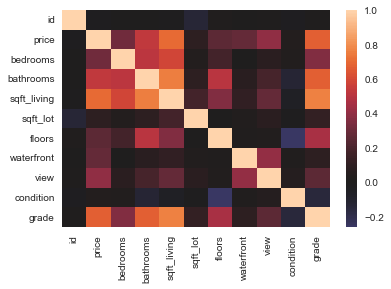

In [57]:
#creatinga heatmap to learn even more 
import seaborn as sns
sns.heatmap(data_pred.corr(), center=0);

Each square shows the correlation between the variables on each axis. Correlation ranges from -2 to +1. Data closer to zero means there is no linear relationship between the two variables.
We add further complexity when connecti. 

In [ ]:
#3 important parameter estimates or statistics.

In [ ]:
#after you finish refining your models, you should provide 1-3 paragraphs discussing your final model

In [ ]:
 #your notebook and presentation should discuss at least two features that have strong relationships with housing prices.